# Capstone Project

## Background

We are glad you have successfully reached the capstone project part of "Data Science Fundamentals" course. You will put everything 
you have learned so far about data science to work. The outcome of this module should potentially serve as your portfolio item.

Unlike with previous projects, this time you are free to choose a dataset to explore from three suggested ones. As you will have to solve a provided problem, there will not be list of predefined questions that you have to answer - be creative and explore any dimensions of data you deem worth analyzing.

Although this might seem scary, this is how data science looks like in the industry. Often, it's your responsibility to not only give answers using the data, but also raise questions. The more creatively you look at this project, the better. Good luck!

----

## Requirements

Whichever problem you choose to analyze, general requirements are as follow:

#### Exploratory Data Analysis
* Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data.
* Grouping the data and analyzing the groups - using Pandas aggregate methods.
* Work with features - handle missing data if needed, use pandas date APIs.
* Manipulate datasets - use joins in needed.
* Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.

#### Statistical hypothesis testing
* Use at least one statistical significance test.
* Report p-values.
* Use visualizations.

#### Modeling
* Visualize data with dimensionality reduction algorithms.
* Perform cluster analysis.
* Use a linear model to explain relationships and predict new values.

#### Presentation
* Present the project - the data, methods and results.

## Problems

#### COVID-19 crisis 

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1574515944794-d6dedc7150de?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1532&q=80" /></div>

The world is still struggling with one the most rapidly spreading pandemics. There are a lot of people who say that data is the best weapon we can use in this "Corona Fight". 

Imagine that you are one of the best data scientists in your country. The president of your country asked you to analyze the COVID-19 patient-level data of South Korea and prepare your homeland for the next wave of the pandemic. You, as the lead data scientist of your country **have to create and prove a plan of fighting the pandemics in your country** by analyzing the provided data. You must get most important insights using learned data science techniques and present them to the lead of your country.

https://www.kaggle.com/kimjihoo/coronavirusdataset/

## Evaluation Criteria

- Code quality
- Fulfillment of the idea
- Adherence to the requirements
- Delivery of the presentation

#### Statistical hypothesis testing
- Correct statistical test method is used, based on the situation.
- Reasoning on chosen statistical significance level.

#### Modeling
- Both PCA and T-SNE algorithms are used.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

import missingno
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

# **EDA**

### **CASES**

How people get infected?

In [ ]:
import pandas as pd
case =pd.read_csv("Case.csv", encoding = 'latin-1')
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


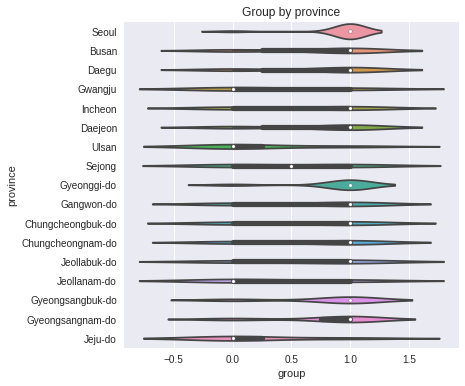

In [ ]:
case.isnull().sum()
le = LabelEncoder()
case.group = le.fit_transform(case.group)
plt.figure(figsize = (6,6)) 
plt.title("Group by province")
sns.violinplot('group', 'province',data = case)

If the value is 'TRUE', the value of 'infection_cases' means the name of group. The values named 'contact with patient', 'overseas inflow' and 'etc' are not group infection. In the provinces the majority of infection happened among groups.

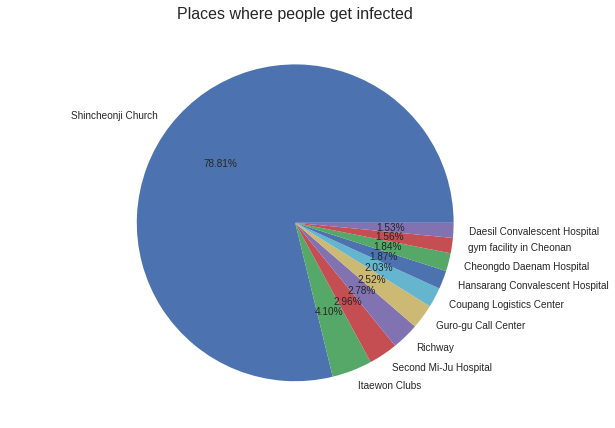

In [ ]:
cases = case.loc[(case.group.isin([True]))]
cases_count = cases.groupby('infection_case', as_index = False).sum().sort_values(by = "confirmed", ascending = False)
df = cases_count[0:10]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
infections = df.infection_case
count = df.confirmed
ax.pie(count, labels = infections,autopct='%1.2f%%')
plt.title("Places where people get infected", fontsize=16)
plt.show()

Mostly people get infected in church, hospitals, clubs or some kind of centers.

### **PATIENTS**

In [ ]:
patient = pd.read_csv("PatientInfo.csv", encoding = 'latin-1')
patient.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


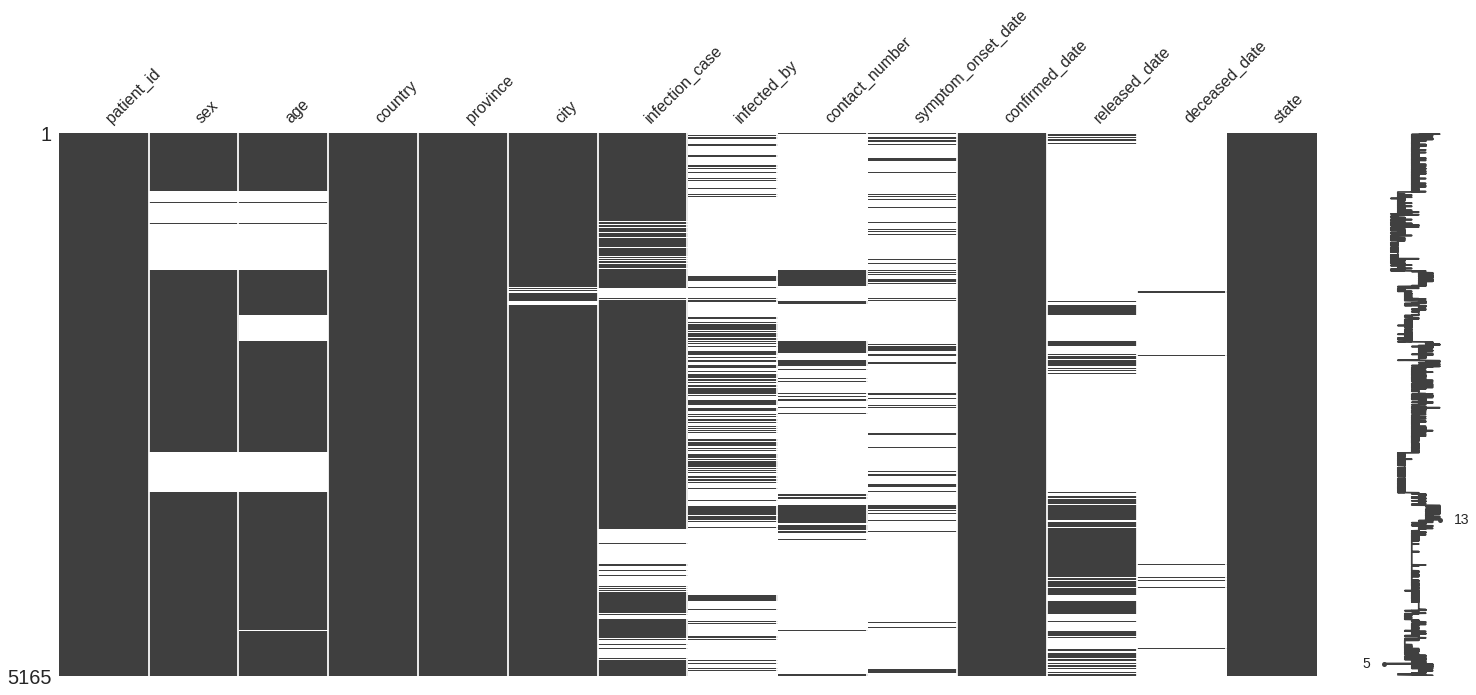

In [ ]:
if patient.isnull().any(axis=None):
    missingno.matrix(patient)
    plt.show()

In [ ]:
patient.deceased_date.replace({np.nan: "Not dead/Unknown"}, inplace=True)
patient.replace({np.nan: "Unknown"}, inplace=True)

Do patient state depends on gender?

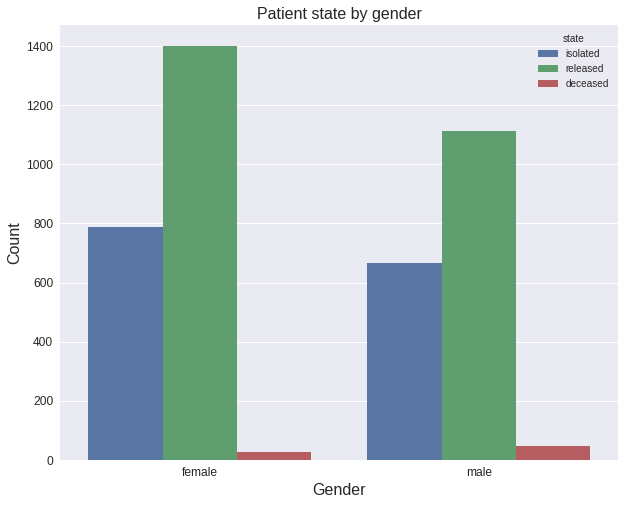

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x = "sex",
            hue="state",
              order=["female", "male"],
            hue_order=["isolated", "released", "deceased"],
            data=patient)
plt.title("Patient state by gender", fontsize=16)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

It is hard to state that patient state depends on gender.

How long does the average duration of treatment take?

In [ ]:
patient.confirmed_date = pd.to_datetime(patient.confirmed_date, errors = 'coerce')
patient.released_date = pd.to_datetime(patient.released_date, errors = 'coerce')
patient['num_of_days_in_hospital'] = (patient['released_date'] - patient['confirmed_date'])
patient.drop(['patient_id', 'infected_by','symptom_onset_date','confirmed_date','released_date','deceased_date'], axis = 1, inplace = True)
patient.head()

,sex,age,country,province,city,infection_case,contact_number,state,num_of_days_in_hospital
0,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,75,released,13 days
1,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,31,released,32 days
2,male,50s,Korea,Seoul,Jongno-gu,contact with patient,17,released,20 days
3,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,9,released,16 days
4,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2,released,24 days


24.73156899810964

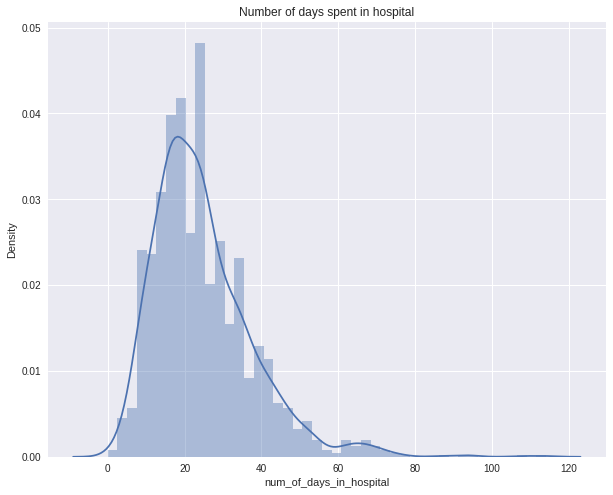

In [ ]:
patient['num_of_days_in_hospital'] = patient['num_of_days_in_hospital']/np.timedelta64(1, 'D')
plt.figure(figsize = (10,8))
plt.title("Number of days spent in hospital")
sns.distplot(patient['num_of_days_in_hospital'])
patient.num_of_days_in_hospital.mean()

On avarage people in hospital spend 24 days.

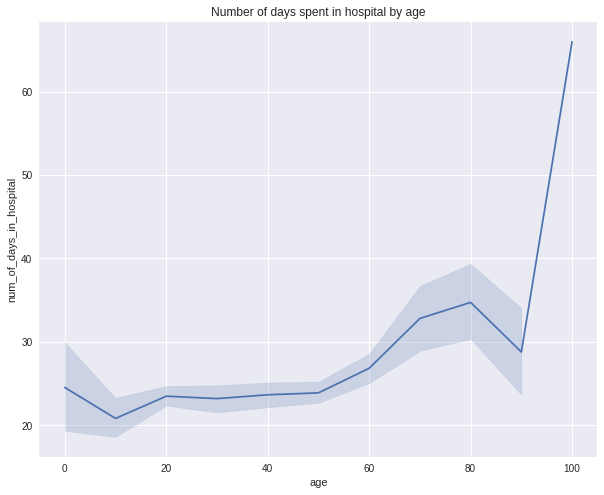

In [ ]:
patient = patient[patient.age != "Unknown"]
patient['age'] =  patient['age'].str.rstrip('s')
patient['age'] =  pd.to_numeric( patient['age'])
plt.figure(figsize = (10,8))
plt.title("Number of days spent in hospital by age")

sns.lineplot('age','num_of_days_in_hospital',  data = patient)


Time spent in hospital increases with age.

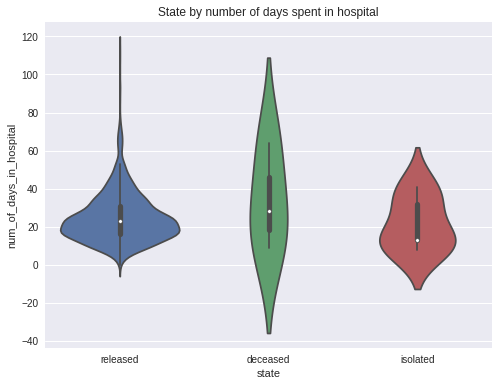

In [ ]:
plt.figure(figsize = (8,6))
plt.title("State by number of days spent in hospital")
sns.violinplot('state','num_of_days_in_hospital',data = patient)

Those who were isolated were released from the hospital sooner. Those who died stayed in the hospital the longest.

### **POLICY**

In [ ]:
policy = pd.read_csv("Policy.csv", encoding = 'latin-1')
policy.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [ ]:
policy.dropna(inplace=True)

In [ ]:
if policy.isnull().any(axis=None):
    missingno.matrix(policy)
    plt.show()

What is distribution of the duration with different types of policies?

In [ ]:
policy.start_date = pd.to_datetime(policy.start_date, errors = 'coerce')
policy.end_date = pd.to_datetime(policy.end_date, errors = 'coerce')
policy['duration'] = (policy['end_date'] - policy['start_date'])
policy['duration'] = policy['duration']/np.timedelta64(1, 'D')

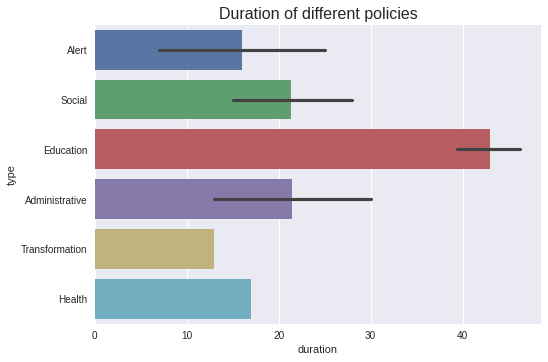

In [ ]:
plt.title("Duration of different policies", fontsize=16)
sns.barplot( 'duration', 'type',data = policy)

The policies regarding education were the longest ones.

### **REGION**

Which provinces are the most affected?

In [ ]:
region = pd.read_csv("Region.csv", encoding = 'latin-1')
region.drop(columns=['code', 'latitude', 'longitude', 'city'], inplace=True)
region.set_index('province', inplace=True)
region.head()

,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
province,,,,,,,
Seoul,607,830,48,1.44,15.38,5.8,22739
Seoul,33,38,0,4.18,13.17,4.3,3088
Seoul,27,32,0,1.54,14.55,5.4,1023
Seoul,14,21,0,0.67,19.49,8.5,628
Seoul,36,56,1,1.17,14.39,5.7,1080


In [ ]:
province_sum = region.groupby('province').sum()
province_sum.drop(province_sum.index[14], inplace=True)
province_sum.reset_index(inplace=True)

In [ ]:
if region.isnull().any(axis=None):
    missingno.matrix(region)
    plt.show()

In [ ]:
merged = province_sum.merge(provinces_group, how='inner', on='province')
merged.set_index("province", inplace=True)
merged.sort_values(ascending=False, by="confirmed")

,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,confirmed,released,deceased
province,,,,,,,,,,
Daegu,458,710,22,15.42,153.28,71.7,10166,807506,600431,17624
Gyeongsangbuk-do,942,1414,66,22.77,661.35,363.2,8948,161079,117042,5393
Seoul,1214,1660,96,35.36,409.19,154.0,45478,81923,48687,298
Gyeonggi-do,2554,4474,122,45.46,461.75,194.7,40982,81059,52096,1600
Chungcheongnam-do,818,998,42,17.96,381.51,187.3,7282,16780,12814,0
Incheon,500,806,14,11.60,180.39,79.6,8994,16645,8904,16
Busan,608,816,44,22.57,329.08,154.6,13504,16341,12678,299
Gyeongsangnam-do,1002,1372,42,25.90,470.24,279.7,10728,13860,10549,0
Gangwon-do,698,736,36,21.22,434.92,220.0,5038,5908,4076,225


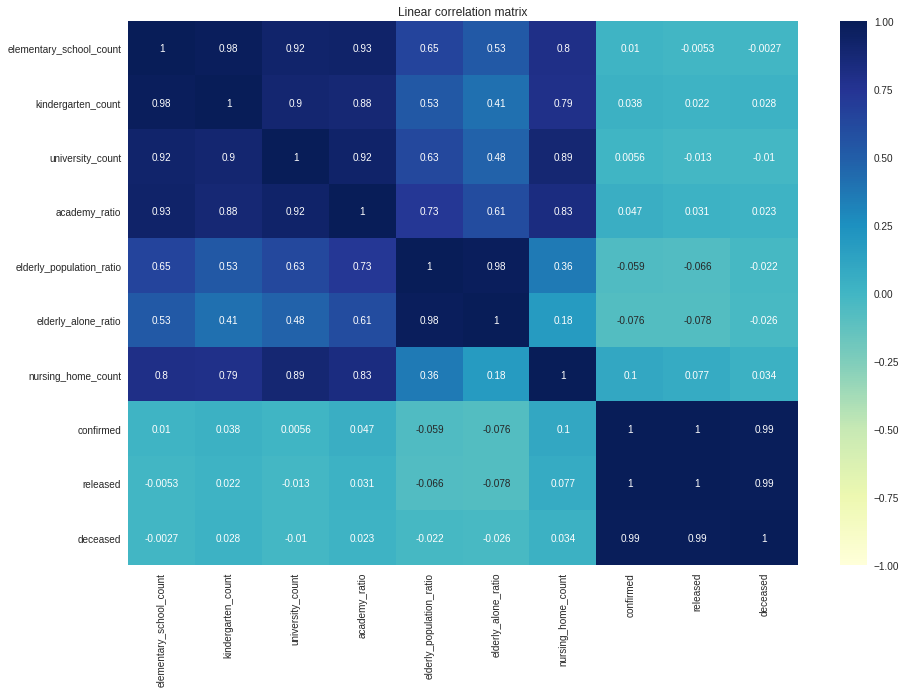

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(merged.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('Linear correlation matrix')
plt.show()

The most affected provinces are Daegu, Gyeongsangbuk-do, Seoul. 	

### **TREND**

What are search trends involving respiratory diseases?

In [ ]:
trend = pd.read_csv("SearchTrend.csv", encoding = 'latin-1')
trend.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [ ]:
if trend.isnull().any(axis=None):
    missingno.matrix(trend)
    plt.show()

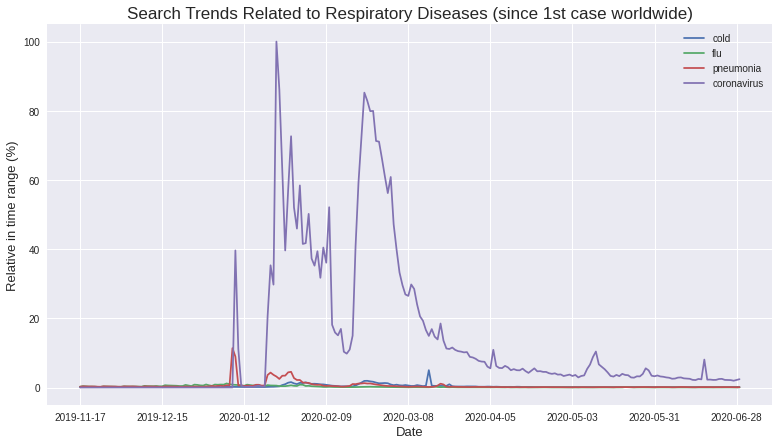

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))

plt.title('Search Trends Related to Respiratory Diseases (since 1st case worldwide)', size=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Relative in time range (%)', size=13)

for col in trend.columns[1:]:
    sns.lineplot(trend.date[trend.date >= '2019-11-17']
             , trend[trend.date >= '2019-11-17'][col])
    
ax.set_xticks(ax.get_xticks()[::int(len(trend.date[trend.date >= '2019-11-17'])/8)])
ax.legend(trend.columns.drop("date"))
plt.show()

Searching coronavirus decreases rapidly after few months of peaking.

### **SEOUL**

In [ ]:
seoul = pd.read_csv("SeoulFloating.csv", encoding = 'latin-1')
seoul.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [ ]:
if seoul.isnull().any(axis=None):
    missingno.matrix(seoul)
    plt.show()

Floating population: A group of people who reside in a given population for a certain amount of time and for various reasons, but are not generally considered part of the official census count

What age group is most common for floating population?

In [ ]:
birth_year = seoul.groupby('birth_year', as_index = False).sum()

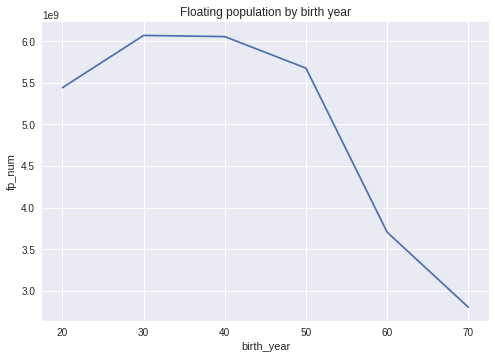

In [ ]:
plt.title('Floating population by birth year')
sns.lineplot('birth_year', 'fp_num', data = birth_year)

The distribution of the population according to birth year shows that people aged 30-40 refers to the most common floating population group.

### TIME AND **AGE**

How related confirmed cases and death are by age group?

In [ ]:
time_age = pd.read_csv("TimeAge.csv", encoding = 'latin-1')
time_age.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [ ]:
if time_age.isnull().any(axis=None):
    missingno.matrix(time_age)
    plt.show()

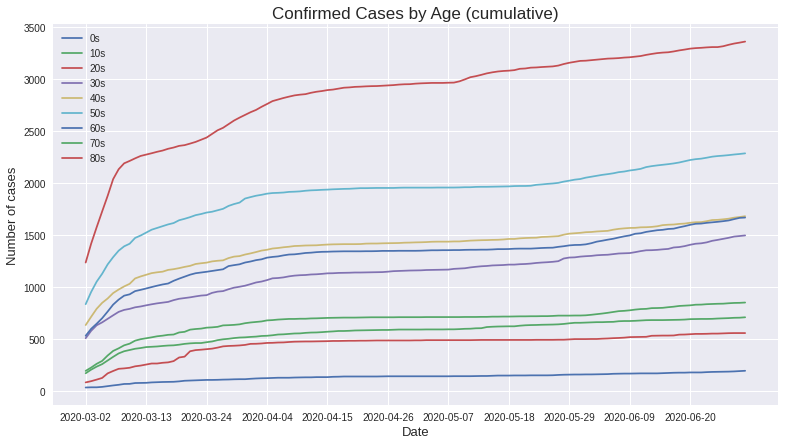

In [ ]:
def plot_groupby(data, groupby, column, title, ylabel=None, axis=None):
    
    fig, ax = plt.subplots(figsize=(13, 7))
    plt.title(f'{title}', fontsize=17)
    ax.set_xlabel('Date', size=13)
    ax.set_ylabel('Number of cases', size=13)

    
    group_list = data.groupby(groupby)
    for group in group_list:
        if axis == None:
            sns.lineplot(group[1].date.values
                     , group[1][column].values
                     , label=group[0])
        else:
            sns.lineplot(group[1].date.values
                     , group[1][column].values
                     , label=group[0])
  
    dates_num = 12
    ax.set_xticks(ax.get_xticks()[::int(len(time_age.date.unique())/dates_num)+1])
    ax.legend()
    plt.show()
plot_groupby(time_age, 'age', 'confirmed', 'Confirmed Cases by Age (cumulative)')

People in their 20s occupies majority of all confirmed cases.

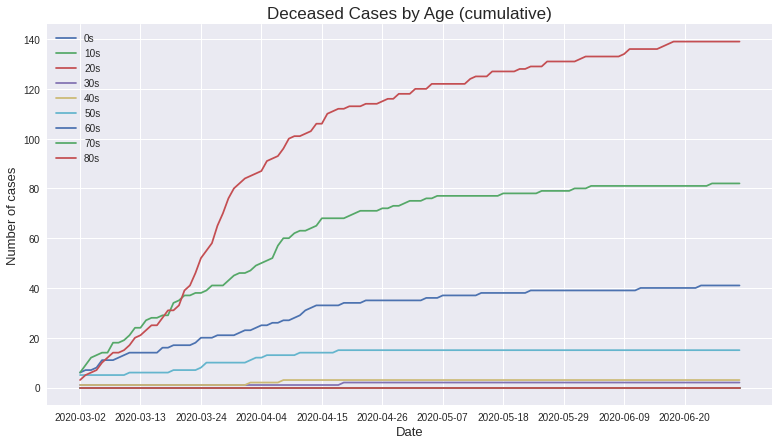

No handles with labels found to put in legend.


,age,deceased
0,0s,0
1,10s,0
2,20s,0
3,30s,2
4,40s,3
5,50s,15
6,60s,41
7,70s,82
8,80s,139


In [ ]:
plot_groupby(time_age, 'age', 'deceased', 'Deceased Cases by Age (cumulative)')

age_deceased = time_age.tail(9)[['age', 'deceased']]
age_deceased.set_index(np.arange(0, len(time_age.age.unique())), inplace=True)
ax.legend()
display(age_deceased)

Death is more common for people in their 80s.

### TIME AND **GENDER**

In [ ]:
time_gender = pd.read_csv("TimeGender.csv", encoding = 'latin-1')
time_gender.drop(columns=['date', 'time'], inplace=True)
time_gender

,sex,confirmed,deceased
0,male,1591,13
1,female,2621,9
2,male,1810,16
3,female,3002,12
4,male,1996,20
...,...,...,...
237,female,7265,131
238,male,5470,151
239,female,7287,131
240,male,5495,151


Is there a gap between genders concerning confirmed cases?

In [ ]:
if time_gender.isnull().any(axis=None):
    missingno.matrix(time_gender)
    plt.show()

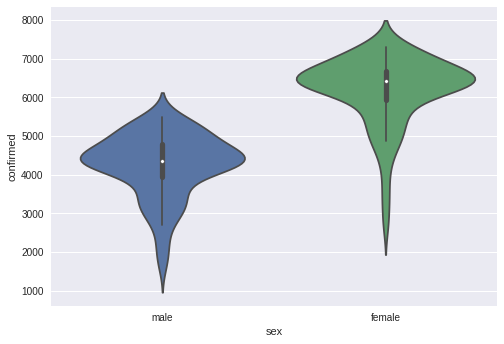

In [ ]:
sns.violinplot('sex', 'confirmed', data = time_gender) 

### TIME AND **PROVINCE**

In [ ]:
time_province = pd.read_csv("TimeProvince.csv", encoding = 'latin-1')
time_province.drop(columns=['time', 'date'], inplace=True)
time_province.head()

,province,confirmed,released,deceased
0,Seoul,0,0,0
1,Busan,0,0,0
2,Daegu,0,0,0
3,Incheon,1,0,0
4,Gwangju,0,0,0


In [ ]:
if time_province.isnull().any(axis=None):
    missingno.matrix(time_province)
    plt.show()

In [ ]:
provinces_group = time_province.groupby('province').sum()

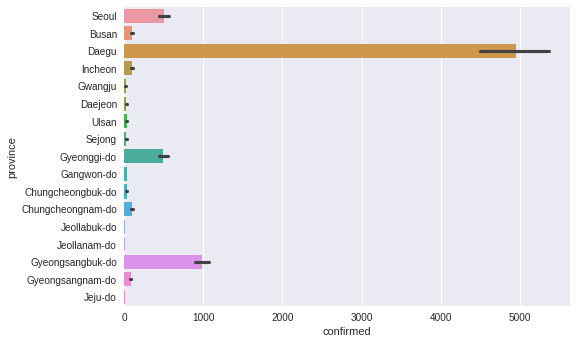

In [ ]:
sns.barplot('confirmed','province', data = time_province)

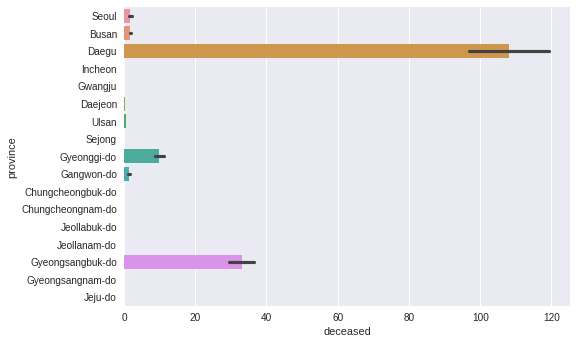

In [ ]:
sns.barplot('deceased','province', data = time_province)

Daegu is the only province with disproportionally high deceased number of deaths. 
Seoul, though, has lower deaths than expected. The question for both is why?

### **WEATHER**

In [ ]:
weather = pd.read_csv("Weather.csv", encoding = 'latin-1')
weather.set_index("province", inplace=True)
weather.drop(columns=['code', 'date'], inplace=True)
weather.head()

,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
province,,,,,,,
Seoul,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
Busan,5.3,1.1,10.9,0.0,7.4,340.0,52.1
Daegu,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
Gwangju,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
Incheon,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


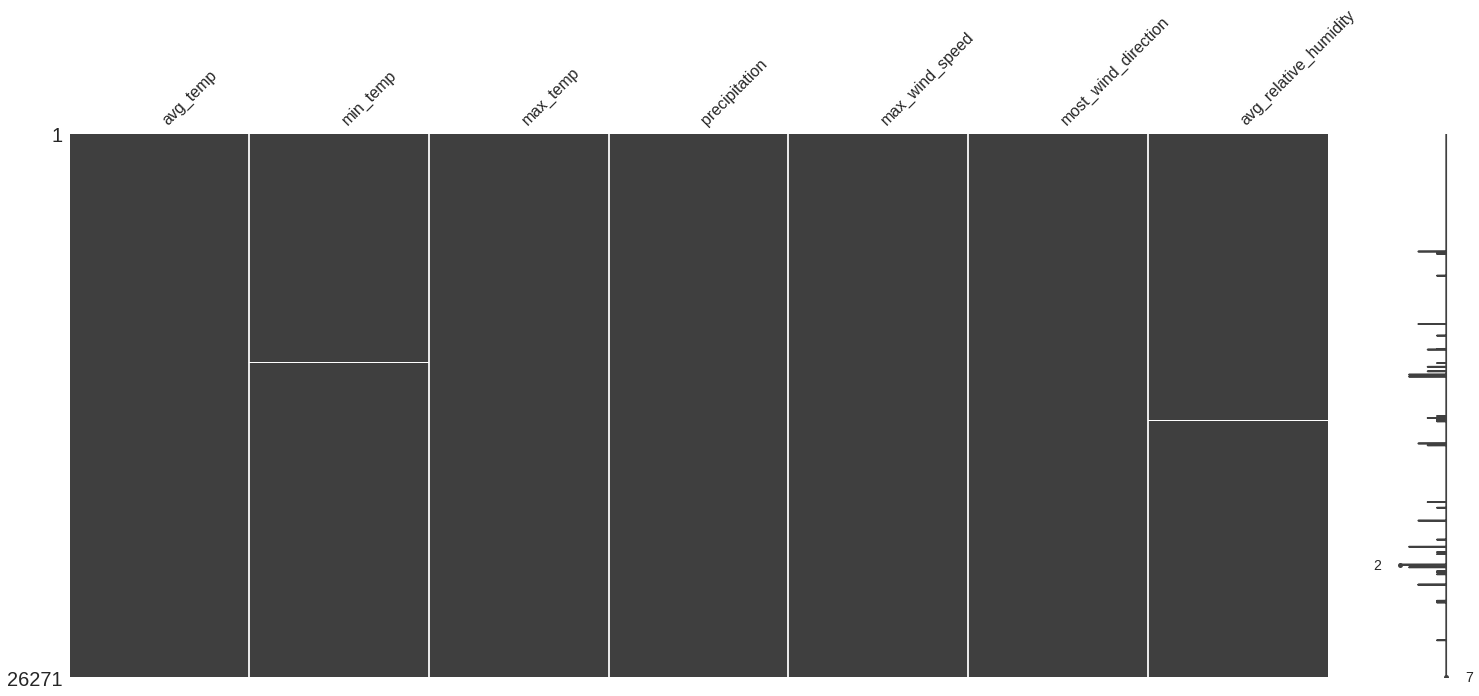

In [ ]:
if weather.isnull().any(axis=None):
    missingno.matrix(weather)
    plt.show()

In [ ]:
weather.dropna(inplace=True)

In [ ]:
weather_status = weather.groupby('province').mean()
weather_status.sort_values(ascending=True, by="avg_relative_humidity")

,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
province,,,,,,,
Gangwon-do,13.874085,9.933293,18.316341,1.445732,5.038232,234.817073,55.610549
Seoul,13.056471,8.852991,18.062271,1.417277,4.531074,210.238095,57.732540
Daegu,14.298355,9.424071,19.811639,1.260451,4.988483,208.860451,60.316941
Gyeongsangbuk-do,13.522318,8.800555,19.036005,1.293711,6.147287,180.789149,62.472195
Busan,15.169329,11.857378,19.397561,1.893780,6.397378,186.219512,62.841707
Gyeongsangnam-do,14.381790,10.269671,19.387942,1.866382,4.499513,135.767357,64.314129
Chungcheongbuk-do,11.901861,6.293859,18.188648,1.250993,3.914330,149.205955,64.874380
Jeollanam-do,14.847738,11.898594,18.447738,1.848716,7.948839,182.353301,65.313447
Ulsan,14.438672,10.224665,19.201340,1.562058,4.681669,257.082826,66.163459


Dry air makes the mucous membranes in our noses dry and more permeable to viruses. Drop in humidity makes it easier for airborne viral particles to travel. Seoul, Daegu, Gangwon-do and Gyeongsangbuk-do, which are part of provinces with lowest humidity levels are also the ones with most confirmed cases.

# Statistical significance test

Test of independence between sex and confirmed cases.
Chi-square test is the most suitable tool to check if association between variables is significant, because of categorical variables. 


In [ ]:
from scipy import stats
from scipy.stats import chisquare, chi2_contingency, chi2

cross = pd.crosstab(patient["sex"],patient["state"])
observed = np.array(cross.values)
stat, p, dof, expected = stats.chi2_contingency(observed)
alpha = 0.05
p_value = stats.chi2.cdf(x=stat, df=dof)

if (p_value <= alpha):
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
p_value

Independent (fail to reject H0)


0.9883493429396242

The p_value is approx
0.9 which is way more than 0.05, there is no statistical significance between sex and confirmed cases.

# PCA

In [ ]:
import plotly.figure_factory as ff
from sklearn.preprocessing import MinMaxScaler

df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(region), 
                         columns=region.columns)
ff.create_distplot([df_scaled[c] for c in df_scaled.columns], 
                    df_scaled.columns, 
                    show_hist=False)

In [ ]:
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 

pca = PCA()
pca.fit(df_scaled)
exp_variance = pca.explained_variance_ratio_

Text(0.5, 1.0, 'Cumulative explained variance')

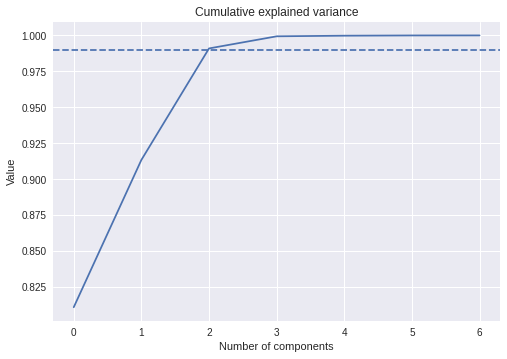

In [ ]:
cum_exp_variance = np.cumsum(exp_variance)
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.99, linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Value')
plt.title('Cumulative explained variance')

In [ ]:
pca = PCA(2)
pca.fit(df_scaled)
pca_projection = pca.transform(df_scaled)

In [ ]:
PCA_components = pd.DataFrame(pca_projection)

In [ ]:
import plotly.express as px
fig = px.scatter(PCA_components, x=0, y=1, color=region.index)
fig.show()

# T-SNE

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)
results = pd.DataFrame(tsne_results)

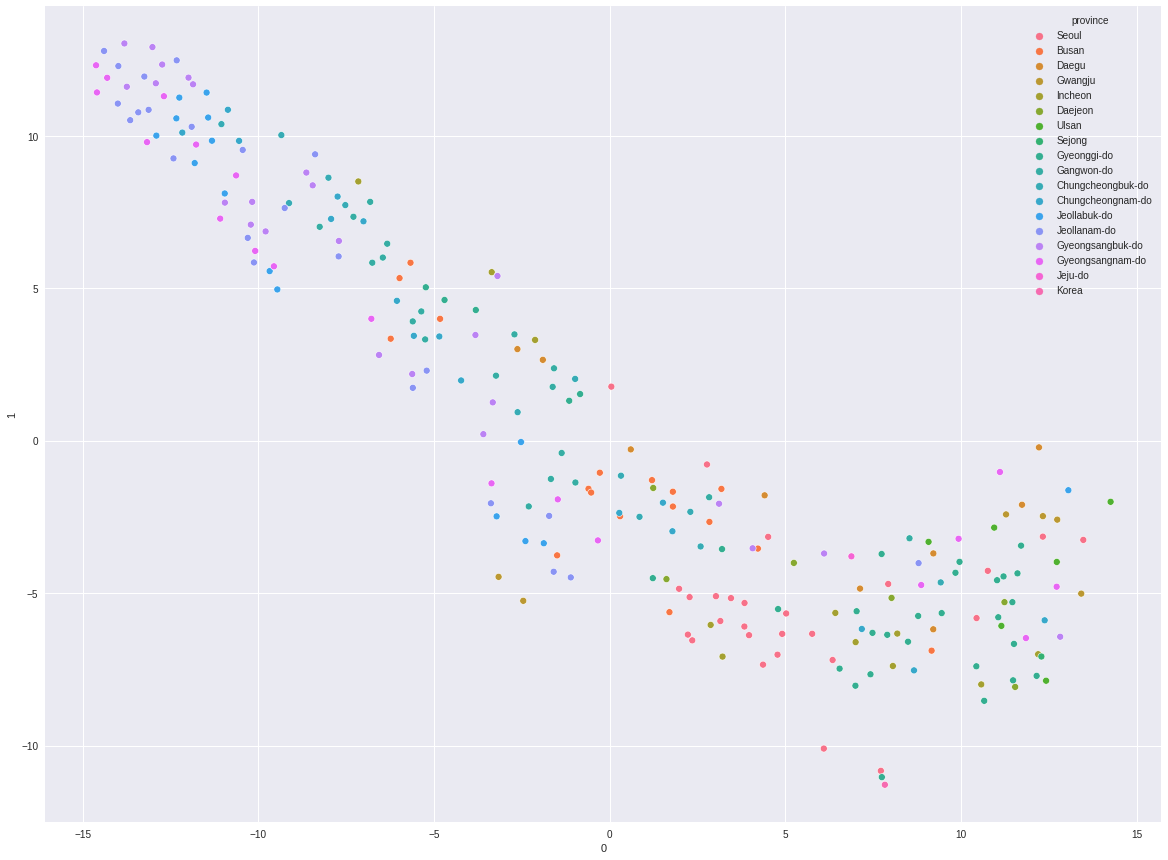

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))

sns.scatterplot(data=results, x=0, y=1, hue =region.index)

def label_point(x, y, val, ax):
    for _x, _y, _val in zip(x, y, val):
        ax.text(_x, _y, str(_val))

# Clusters

Clustering of cases

In [ ]:
cases = case.drop(columns=["latitude", "longitude", "group"])

In [ ]:
le = LabelEncoder()

for col in cases.columns.values:
  if cases[col].dtypes == 'object':
    le.fit(cases[col].values)
    cases[col] = le.transform(cases[col])

cases.head()

,case_id,province,city,infection_case,confirmed
0,1000001,15,46,34,139
1,1000002,15,22,50,119
2,1000003,15,21,26,95
3,1000004,15,42,71,43
4,1000005,15,10,10,43


In [ ]:
scaled = pd.DataFrame(MinMaxScaler().fit_transform(cases), 
                         columns=cases.columns)
ff.create_distplot([scaled[c] for c in scaled.columns], 
                    scaled.columns, 
                    show_hist=False)

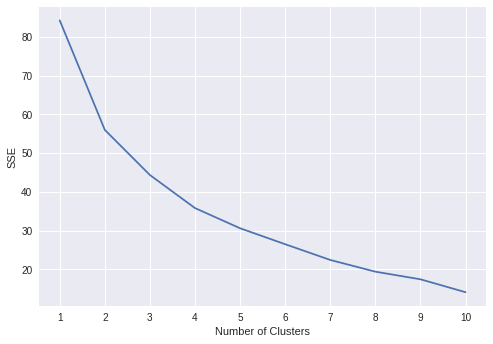

In [ ]:
from sklearn.cluster import KMeans

kmeans_kwargs = {  
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

sse = [] 
for k in range(1, 11): 
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)  
  kmeans.fit(scaled)  
  sse.append(kmeans.inertia_)  

fig, axs = plt.subplots()
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

fig.set(facecolor='white')
plt.show()

In [ ]:
! pip install kneed

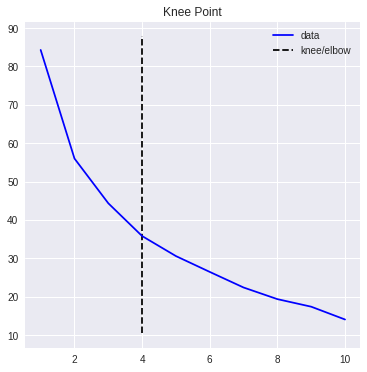

In [ ]:
from kneed import KneeLocator

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
    )
kl.plot_knee()

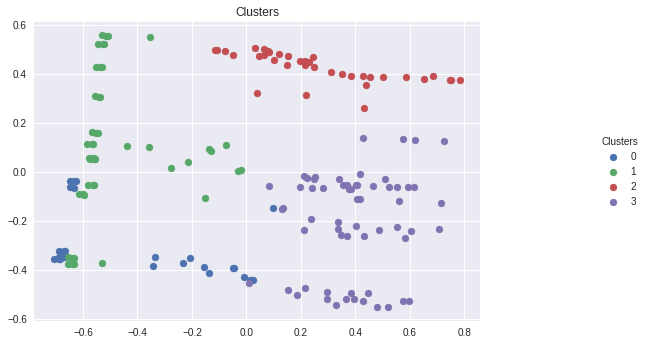

In [ ]:
from sklearn.cluster import KMeans
pca = PCA()
df = pca.fit_transform(scaled)
kmeans = KMeans(init="k-means++",
                n_clusters=4,
                random_state=15,
                max_iter = 500).fit(scaled)
label = kmeans.fit_predict(scaled)
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1,title="Clusters")
plt.title('Clusters')
plt.show()

# Linear model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif

Humidity prediction

In [ ]:
weather.head()

,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
province,,,,,,,
Seoul,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
Busan,5.3,1.1,10.9,0.0,7.4,340.0,52.1
Daegu,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
Gwangju,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
Incheon,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


In [ ]:
le = LabelEncoder()

for col in weather.columns.values:
  if weather[col].dtypes == 'object':
    le.fit(weather[col].values)
    weather[col] = le.transform(weather[col])

weather.dropna(inplace=True)

In [ ]:
X = weather.drop(['avg_relative_humidity'], axis=1)
y = weather.avg_relative_humidity

selector = SelectKBest(score_func=f_classif, k=2)
fitted = selector.fit(X, y)
features_scores = pd.DataFrame(fitted.scores_)
features_columns = pd.DataFrame(X.columns)

best_features = pd.concat([features_columns, features_scores], axis=1)
best_features.columns = ['Feature', 'Score']
best_features.sort_values(by='Score', ascending=False, inplace=True)
best_features

,Feature,Score
1,min_temp,14.191817
0,avg_temp,10.602432
2,max_temp,7.835991
3,precipitation,6.071939
4,max_wind_speed,2.949514
5,most_wind_direction,2.832988


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
prediction_diff = y_pred - y_test
check_predictions = {'Predictions': y_pred, 'Actuals': y_test, 'Difference': prediction_diff}
check_predictions_df = pd.DataFrame(check_predictions)
check_predictions_df

,Predictions,Actuals,Difference
province,,,
Busan,80.344551,60.4,19.944551
Daejeon,73.359713,85.1,-11.740287
Ulsan,69.138097,66.5,2.638097
Incheon,64.265747,58.4,5.865747
Seoul,60.703301,52.0,8.703301
...,...,...,...
Jeollanam-do,60.992017,48.3,12.692017
Daejeon,73.126544,83.6,-10.473456
Jeju-do,80.508155,86.3,-5.791845


In [ ]:
print(f"Accuracy score: {regressor.score(X_test, y_test)}")

Accuracy score: 0.39852232532149334


# Summary

 

*  In the provinces the majority of infection happened among groups. Mostly people get infected in church, hospitals, clubs or some kind of centers.
* The state of the patient does not depend on gender.
* Time spent in hospital increases with age. On avarage it is 24 days.Those who were isolated were released from the hospital sooner. Those who died stayed in the hospital the longest.
* The policies regarding education were the longest ones.
* Searching coronavirus decreases rapidly after few months of peaking.
* The distribution of the population according to birth year shows that people aged 30-40 refers to the most common floating population group.
* People in their 20s occupies majority of all confirmed cases. But death is more common for people in their 80s. Countries need to separate the two groups while preventing spreads as a whole.
* The most affected provinces are Daegu, Gyeongsangbuk-do, Seoul. 
Daegu is the only province with disproportionally high deceased number of deaths. Seoul, though, has lower deaths than expected. The question for both is why?
* Drop in humidity makes it easier for airborne viral particles to travel. Seoul, Daegu, Gangwon-do and Gyeongsangbuk-do, which are part of provinces with lowest humidity levels are also the ones with most confirmed cases.












